# Color Quantization using K-Means


In [1]:
from time import time
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

# Get IMG

In [2]:
# Загружаємо фото
image_path = '/content/kpi.jpg'
image = Image.open(image_path)
image

Output hidden; open in https://colab.research.google.com to view.

In [3]:
# Конвертуємо фото в RGB формат і створюємо масив
image_array = np.array(image.convert("RGB"), dtype=np.float64) / 255

In [4]:

# Знаходимо кількість унікальних кольорів
unique_colors = np.unique(image_array.reshape(-1, image_array.shape[2]), axis=0)
num_unique_colors = len(unique_colors)
print("Унікальні кольори на фото", num_unique_colors)

Унікальні кольори на фото 105321


In [5]:
# Функція для квантізації кольорів
def color_quantization(image_array, n_colors):
    # Перетворюємо зображення на 2D-масив пікселів
    width, height, depth = image_array.shape
    reshaped_image_array = np.reshape(image_array, (width * height, depth))

    # Використовуємо KMeans для квантізації кольорів
    image_array_sample = shuffle(reshaped_image_array, random_state=0, n_samples=1000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(reshaped_image_array)

    # Відтворюємо зображення за допомогою центрів кластерів
    quantized_image = kmeans.cluster_centers_[labels]
    quantized_image = np.reshape(quantized_image, (width, height, depth))
    return quantized_image

In [6]:
# Визначаємо рівні квантізації кольорів
color_levels = [64, 32, 16, 8]

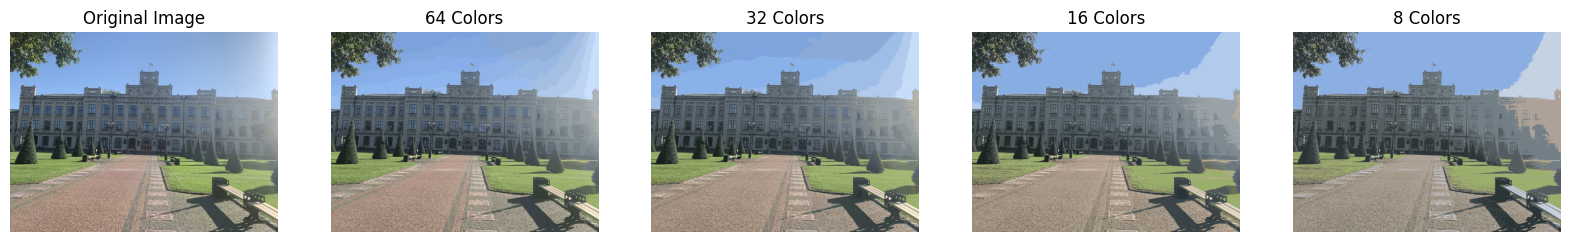

In [7]:
# Відображаємо квантізовані зображення
fig, axes = plt.subplots(1, len(color_levels) + 1, figsize=(20, 10))
axes[0].imshow(image_array)
axes[0].set_title("Original Image")
axes[0].axis("off")

for i, n_colors in enumerate(color_levels):
    quantized_image = color_quantization(image_array, n_colors)
    axes[i + 1].imshow(quantized_image)
    axes[i + 1].set_title(f"{n_colors} Colors")
    axes[i + 1].axis("off")

plt.show()